## 1. Import Libraries

Let me start by importing everything we'll need for hierarchical clustering and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
np.random.seed(42)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Explore Dataset

For this analysis, I'll use the Wine dataset from sklearn. It contains chemical analysis results of wines from three different cultivars in Italy. It's a classic dataset for classification/clustering with 13 features.

In [2]:
# Load Wine dataset
wine = load_wine()
X = wine.data
y_true = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['wine_class'] = y_true
df['wine_name'] = df['wine_class'].map({0: target_names[0], 1: target_names[1], 2: target_names[2]})

print("="*70)
print("WINE DATASET OVERVIEW")
print("="*70)
print(f"Dataset Shape: {X.shape}")
print(f"Number of Features: {X.shape[1]}")
print(f"Number of Samples: {X.shape[0]}")
print(f"Number of Classes: {len(np.unique(y_true))}")
print(f"\nClass Distribution:")
print(df['wine_name'].value_counts())
print("\nFeature Names:")
for i, name in enumerate(feature_names, 1):
    print(f"  {i}. {name}")
print("="*70)

WINE DATASET OVERVIEW
Dataset Shape: (178, 13)
Number of Features: 13
Number of Samples: 178
Number of Classes: 3

Class Distribution:
wine_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

Feature Names:
  1. alcohol
  2. malic_acid
  3. ash
  4. alcalinity_of_ash
  5. magnesium
  6. total_phenols
  7. flavanoids
  8. nonflavanoid_phenols
  9. proanthocyanins
  10. color_intensity
  11. hue
  12. od280/od315_of_diluted_wines
  13. proline


In [ ]:
# Display first few rows
print("\nFirst 5 samples:")
display(df.head())

# Statistical summary
print("\nStatistical Summary:")
display(df.describe())

### Data Visualization

Let me create some visualizations to understand the data distribution and relationships between features.

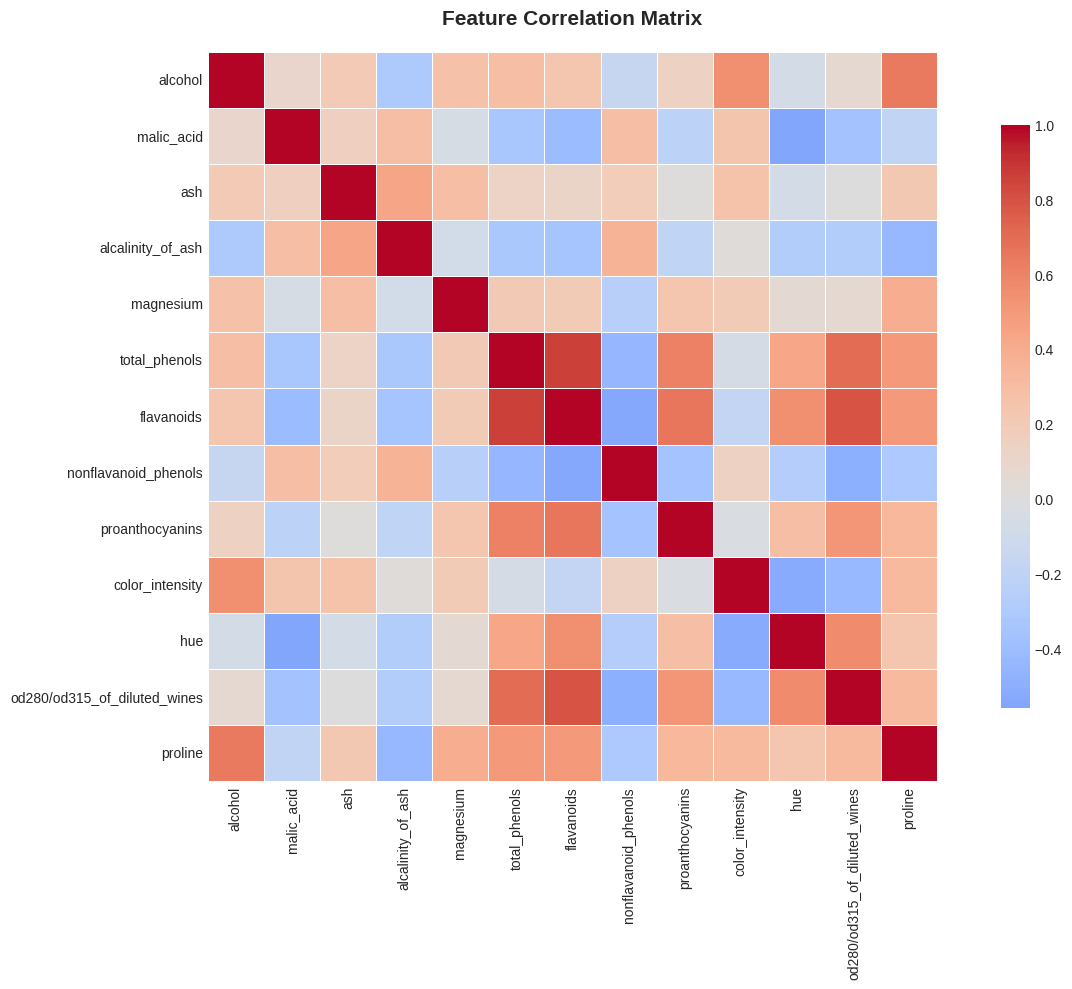


💡 The correlation matrix helps us understand which features are related.
Strong correlations might indicate redundant information.


In [3]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.drop(['wine_class', 'wine_name'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 The correlation matrix helps us understand which features are related.")
print("Strong correlations might indicate redundant information.")

### Preprocessing

Hierarchical clustering, like K-Means, is also distance-based so we need to standardize our features.

In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature Standardization:")
print(f"Original - Mean: {X.mean(axis=0)[:3]} ... (showing first 3)")
print(f"Original - Std: {X.std(axis=0)[:3]} ... (showing first 3)")
print(f"\nScaled - Mean: {X_scaled.mean(axis=0)[:3]} ... (should be ~0)")
print(f"Scaled - Std: {X_scaled.std(axis=0)[:3]} ... (should be ~1)")
print("\n✓ Features standardized successfully!")

Feature Standardization:
Original - Mean: [13.00061798  2.33634831  2.36651685] ... (showing first 3)
Original - Std: [0.80954291 1.11400363 0.27357229] ... (showing first 3)

Scaled - Mean: [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15] ... (should be ~0)
Scaled - Std: [1. 1. 1.] ... (should be ~1)

✓ Features standardized successfully!


## 3. Understanding Linkage Methods

Hierarchical clustering uses different "linkage" methods to decide how to merge clusters. Let me visualize what each linkage method produces using dendrograms.

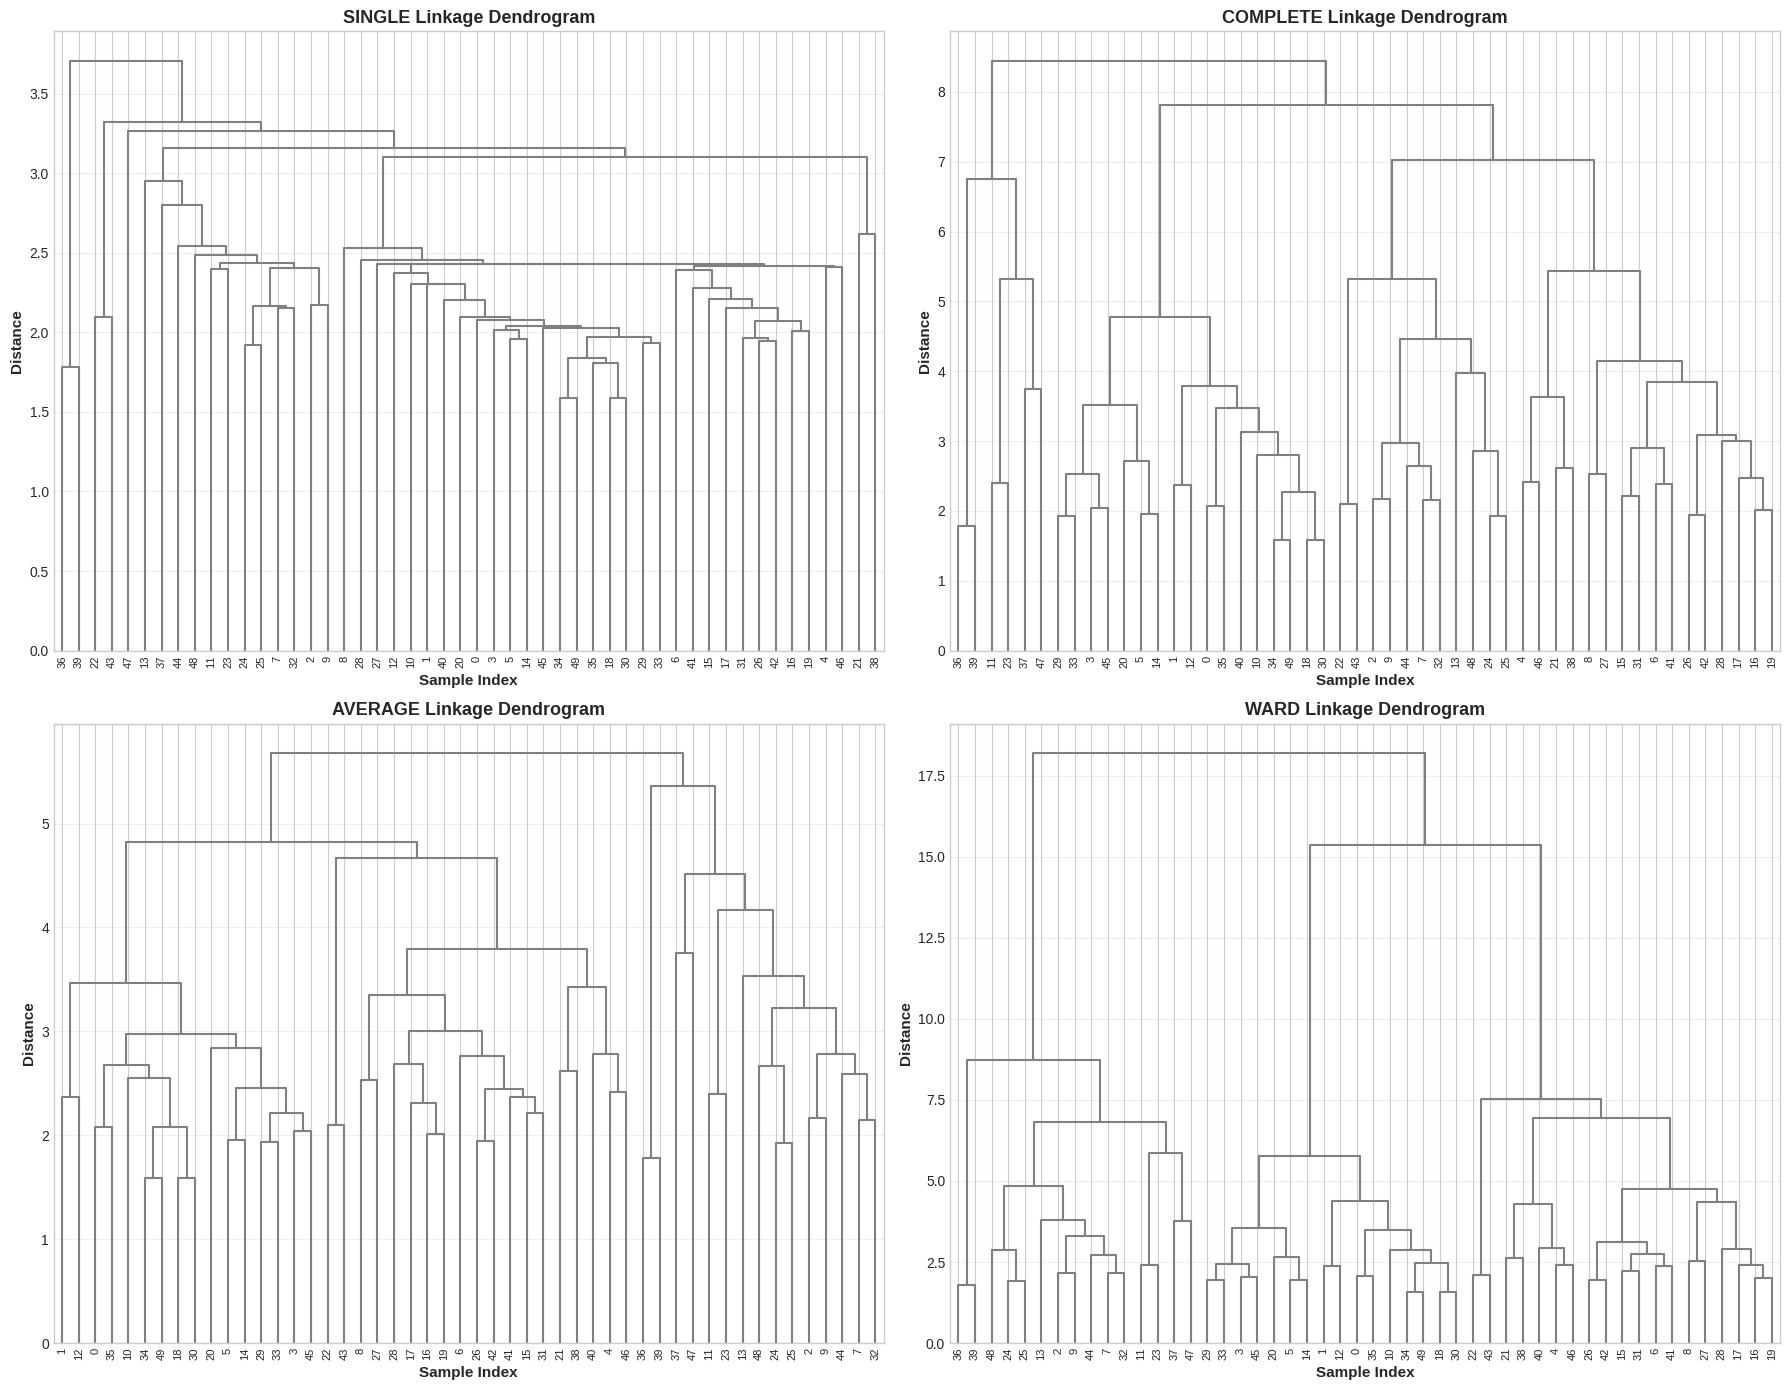


📊 Linkage Methods Explained:

1. SINGLE (nearest neighbor):
   Distance between clusters = minimum distance between any two points
   Tends to create elongated, 'chained' clusters

2. COMPLETE (furthest neighbor):
   Distance between clusters = maximum distance between any two points
   Tends to create compact, spherical clusters

3. AVERAGE:
   Distance between clusters = average distance between all pairs of points
   A balanced compromise between single and complete

4. WARD (minimizes variance):
   Minimizes within-cluster variance when merging
   Often produces the most balanced clusters - my personal favorite!


In [5]:
# Different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# For visualization, let's use a smaller subset to keep dendrograms readable
# We'll randomly sample 50 points
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), size=50, replace=False)
X_sample = X_scaled[sample_indices]
y_sample = y_true[sample_indices]

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.ravel()

for idx, method in enumerate(linkage_methods):
    # Compute linkage matrix
    Z = linkage(X_sample, method=method)

    # Plot dendrogram
    dendrogram(Z, ax=axes[idx], color_threshold=0, above_threshold_color='gray')
    axes[idx].set_title(f'{method.upper()} Linkage Dendrogram',
                       fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Sample Index', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Distance', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Linkage Methods Explained:")
print("\n1. SINGLE (nearest neighbor):")
print("   Distance between clusters = minimum distance between any two points")
print("   Tends to create elongated, 'chained' clusters")
print("\n2. COMPLETE (furthest neighbor):")
print("   Distance between clusters = maximum distance between any two points")
print("   Tends to create compact, spherical clusters")
print("\n3. AVERAGE:")
print("   Distance between clusters = average distance between all pairs of points")
print("   A balanced compromise between single and complete")
print("\n4. WARD (minimizes variance):")
print("   Minimizes within-cluster variance when merging")
print("   Often produces the most balanced clusters - my personal favorite!")

## 4. Creating a Detailed Dendrogram

Let me create a more detailed dendrogram with the full dataset using Ward linkage. The dendrogram shows the hierarchical structure, and we can use it to decide where to "cut" the tree to get our clusters.

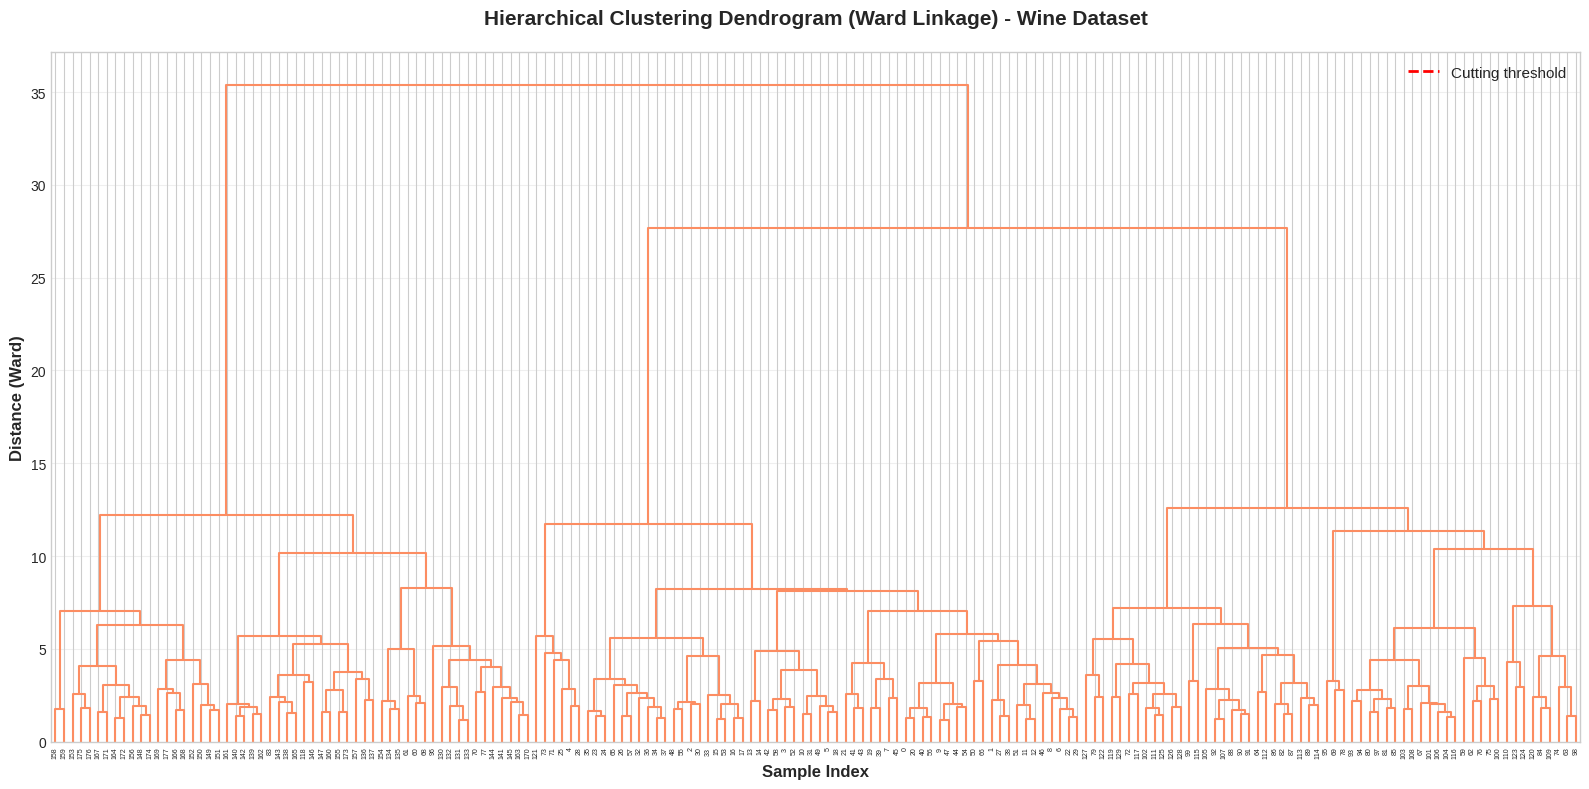


💡 How to read the dendrogram:
  • The height of each branch represents the distance at which clusters merge
  • Longer vertical lines indicate more distinct clusters
  • The horizontal line (red dashed) shows where we 'cut' to get our clusters
  • Everything below the cut line becomes a separate cluster


In [6]:
# Compute linkage matrix for full dataset
Z_full = linkage(X_scaled, method='ward')

# Create dendrogram
plt.figure(figsize=(16, 8))
dendrogram_plot = dendrogram(Z_full,
                             color_threshold=50,  # Color clusters below this threshold
                             above_threshold_color='#888888')

plt.title('Hierarchical Clustering Dendrogram (Ward Linkage) - Wine Dataset',
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Sample Index', fontsize=12, fontweight='bold')
plt.ylabel('Distance (Ward)', fontsize=12, fontweight='bold')
plt.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Cutting threshold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n💡 How to read the dendrogram:")
print("  • The height of each branch represents the distance at which clusters merge")
print("  • Longer vertical lines indicate more distinct clusters")
print("  • The horizontal line (red dashed) shows where we 'cut' to get our clusters")
print("  • Everything below the cut line becomes a separate cluster")

## 5. Applying Hierarchical Clustering

Now let's apply hierarchical clustering with different linkage methods and compare the results.

In [7]:
# Apply hierarchical clustering with different linkage methods
n_clusters = 3  # We know there are 3 wine types

results = {}

print("="*70)
print("HIERARCHICAL CLUSTERING RESULTS (n_clusters=3)")
print("="*70)

for method in linkage_methods:
    # Fit hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    y_pred = hc.fit_predict(X_scaled)

    # Calculate metrics
    silhouette = silhouette_score(X_scaled, y_pred)
    davies_bouldin = davies_bouldin_score(X_scaled, y_pred)
    calinski_harabasz = calinski_harabasz_score(X_scaled, y_pred)
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)

    results[method] = {
        'labels': y_pred,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'calinski_harabasz': calinski_harabasz,
        'ari': ari,
        'nmi': nmi
    }

    print(f"\n{method.upper()} Linkage:")
    print(f"  Silhouette Score:         {silhouette:.4f}")
    print(f"  Davies-Bouldin Index:     {davies_bouldin:.4f}")
    print(f"  Calinski-Harabasz Score:  {calinski_harabasz:.2f}")
    print(f"  Adjusted Rand Index:      {ari:.4f}")
    print(f"  Normalized Mutual Info:   {nmi:.4f}")

    # Cluster sizes
    unique, counts = np.unique(y_pred, return_counts=True)
    print(f"  Cluster Sizes: {dict(zip(unique, counts))}")

print("="*70)

HIERARCHICAL CLUSTERING RESULTS (n_clusters=3)

SINGLE Linkage:
  Silhouette Score:         0.1827
  Davies-Bouldin Index:     0.9105
  Calinski-Harabasz Score:  4.06
  Adjusted Rand Index:      -0.0068
  Normalized Mutual Info:   0.0349
  Cluster Sizes: {np.int64(0): np.int64(174), np.int64(1): np.int64(3), np.int64(2): np.int64(1)}

COMPLETE Linkage:
  Silhouette Score:         0.2038
  Davies-Bouldin Index:     1.8961
  Calinski-Harabasz Score:  48.99
  Adjusted Rand Index:      0.5771
  Normalized Mutual Info:   0.6144
  Cluster Sizes: {np.int64(0): np.int64(69), np.int64(1): np.int64(58), np.int64(2): np.int64(51)}

AVERAGE Linkage:
  Silhouette Score:         0.1575
  Davies-Bouldin Index:     1.0299
  Calinski-Harabasz Score:  4.03
  Adjusted Rand Index:      -0.0054
  Normalized Mutual Info:   0.0184
  Cluster Sizes: {np.int64(0): np.int64(174), np.int64(1): np.int64(1), np.int64(2): np.int64(3)}

WARD Linkage:
  Silhouette Score:         0.2774
  Davies-Bouldin Index:     1.41

### Visualizing Metric Comparisons

Let me create a comparison chart to see which linkage method performs best according to different metrics.

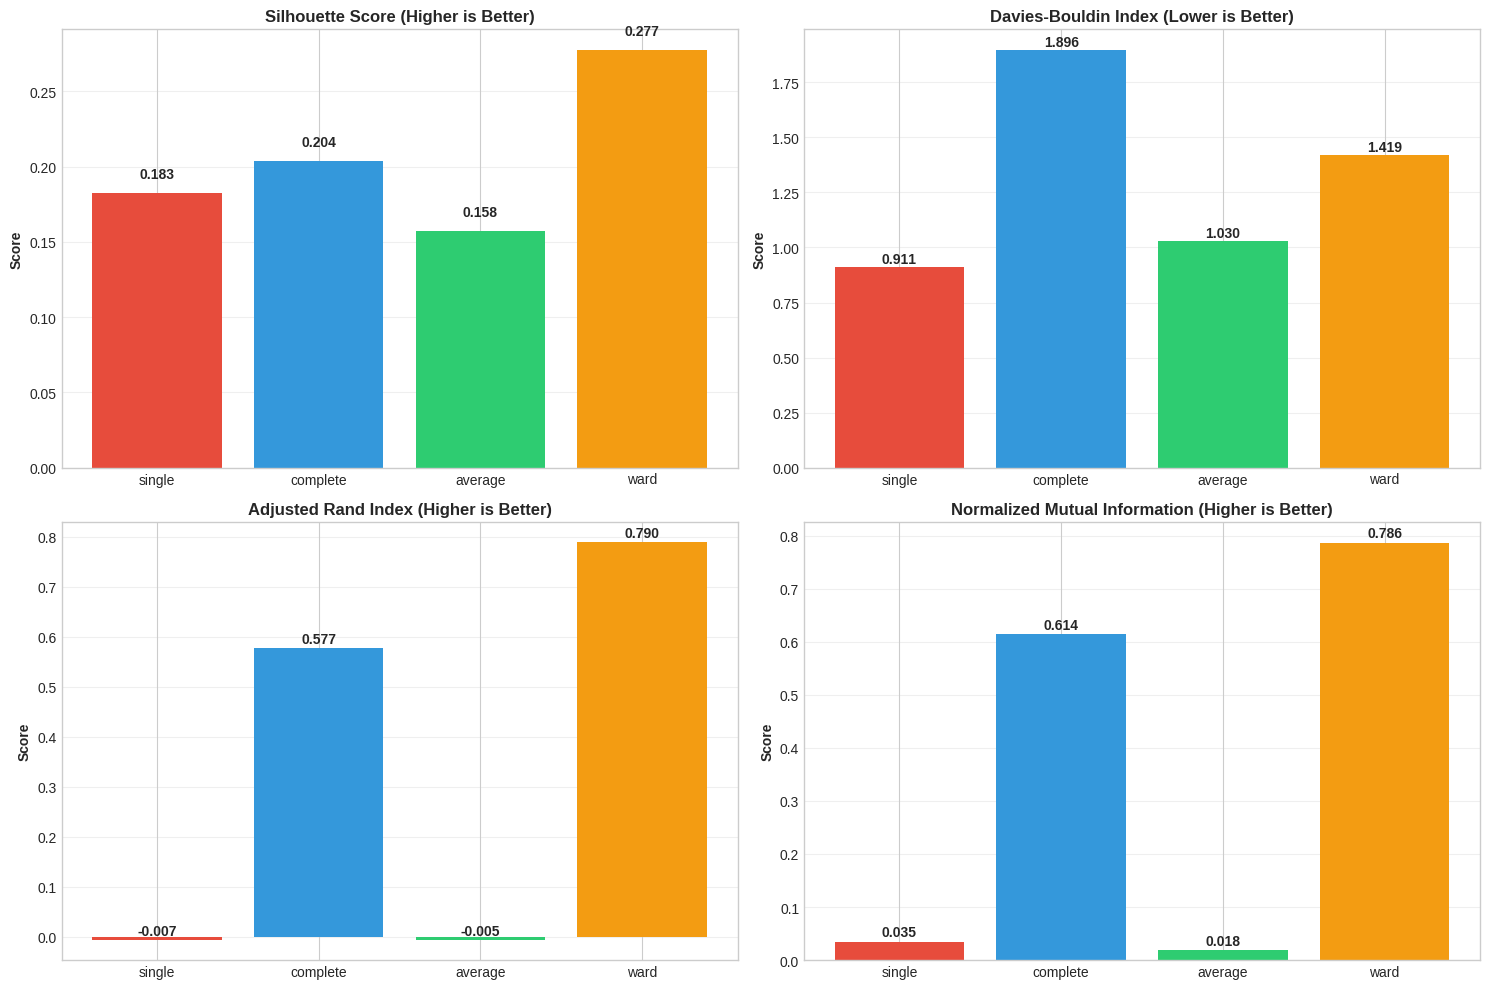


🏆 Best Performing Linkage Method per Metric:
  Silhouette Score:        ward
  Davies-Bouldin Index:    single
  Adjusted Rand Index:     ward
  Normalized Mutual Info:  ward


In [8]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Method': linkage_methods,
    'Silhouette': [results[m]['silhouette'] for m in linkage_methods],
    'Davies-Bouldin': [results[m]['davies_bouldin'] for m in linkage_methods],
    'ARI': [results[m]['ari'] for m in linkage_methods],
    'NMI': [results[m]['nmi'] for m in linkage_methods]
})

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Silhouette Score (higher is better)
axes[0, 0].bar(comparison_df['Method'], comparison_df['Silhouette'],
               color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'])
axes[0, 0].set_title('Silhouette Score (Higher is Better)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Score', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['Silhouette']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Davies-Bouldin Index (lower is better)
axes[0, 1].bar(comparison_df['Method'], comparison_df['Davies-Bouldin'],
               color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'])
axes[0, 1].set_title('Davies-Bouldin Index (Lower is Better)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Score', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['Davies-Bouldin']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Adjusted Rand Index (higher is better)
axes[1, 0].bar(comparison_df['Method'], comparison_df['ARI'],
               color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'])
axes[1, 0].set_title('Adjusted Rand Index (Higher is Better)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Score', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['ARI']):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Normalized Mutual Information (higher is better)
axes[1, 1].bar(comparison_df['Method'], comparison_df['NMI'],
               color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'])
axes[1, 1].set_title('Normalized Mutual Information (Higher is Better)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Score', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['NMI']):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Find best method for each metric
print("\n🏆 Best Performing Linkage Method per Metric:")
print(f"  Silhouette Score:        {comparison_df.loc[comparison_df['Silhouette'].idxmax(), 'Method']}")
print(f"  Davies-Bouldin Index:    {comparison_df.loc[comparison_df['Davies-Bouldin'].idxmin(), 'Method']}")
print(f"  Adjusted Rand Index:     {comparison_df.loc[comparison_df['ARI'].idxmax(), 'Method']}")
print(f"  Normalized Mutual Info:  {comparison_df.loc[comparison_df['NMI'].idxmax(), 'Method']}")

## 6. Detailed Analysis with Best Method

Based on the results, let me pick the best performing method (likely Ward) and do a more detailed analysis.

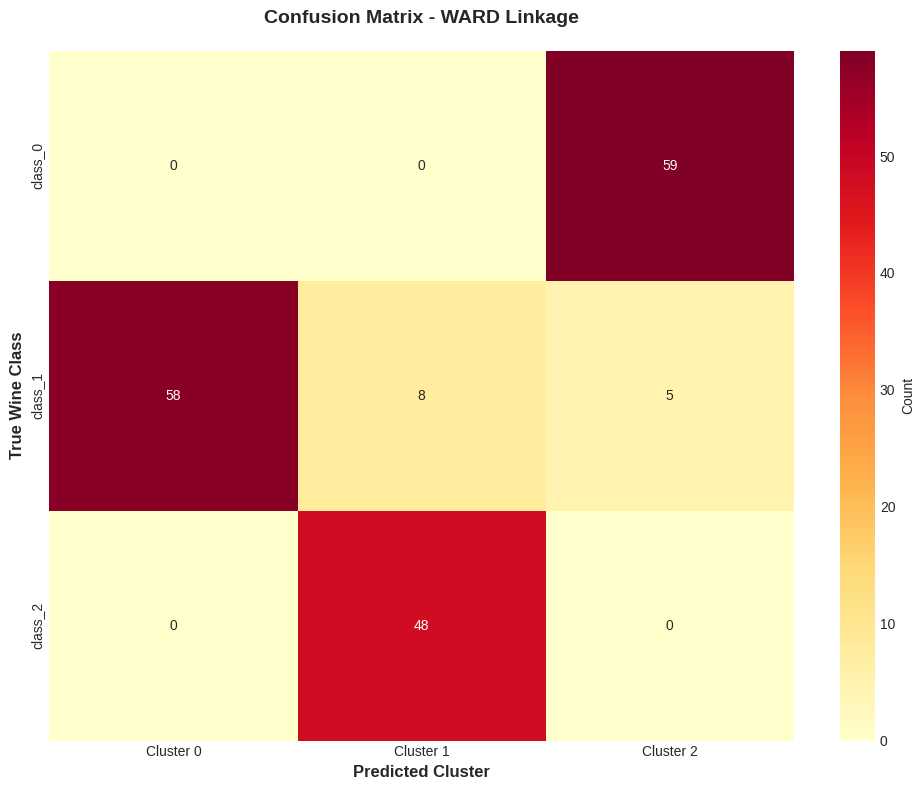


📊 Confusion Matrix Analysis (WARD linkage):
Each row represents a true wine class, columns show predicted clusters.

Cluster-to-Class Mapping:
  Cluster 0 → Mostly class_1 (58/58 = 100.0%)
  Cluster 1 → Mostly class_2 (48/56 = 85.7%)
  Cluster 2 → Mostly class_0 (59/64 = 92.2%)


In [9]:
# Use Ward linkage for detailed analysis (typically performs best)
best_method = 'ward'
y_pred_best = results[best_method]['labels']

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=[f'Cluster {i}' for i in range(n_clusters)],
            yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_method.upper()} Linkage',
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Wine Class', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Cluster', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📊 Confusion Matrix Analysis ({best_method.upper()} linkage):")
print("Each row represents a true wine class, columns show predicted clusters.")
print("\nCluster-to-Class Mapping:")
for cluster in range(n_clusters):
    dominant_class = np.argmax(cm[:, cluster])
    count = cm[dominant_class, cluster]
    total = cm[:, cluster].sum()
    print(f"  Cluster {cluster} → Mostly {target_names[dominant_class]} ({count}/{total} = {count/total*100:.1f}%)")

## 7. Visualizing Clusters in 2D

Since we have 13 features, let me use PCA to reduce to 2D for visualization purposes.

PCA Explained Variance:
  PC1: 36.20%
  PC2: 19.21%
  Total: 55.41%

Note: We're projecting 13D data into 2D, so some information is lost!


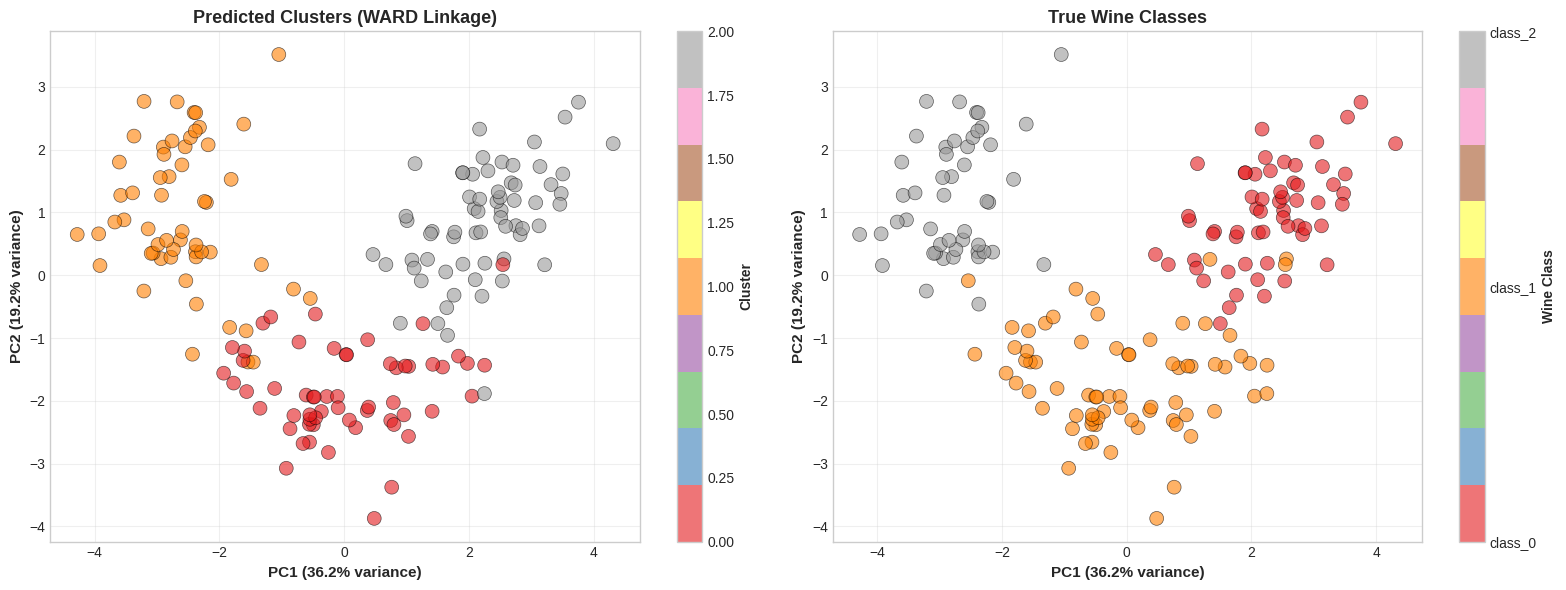

In [10]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA Explained Variance:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.2%}")
print("\nNote: We're projecting 13D data into 2D, so some information is lost!")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot predicted clusters
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_best,
                          cmap='Set1', s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)',
                   fontsize=11, fontweight='bold')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)',
                   fontsize=11, fontweight='bold')
axes[0].set_title(f'Predicted Clusters ({best_method.upper()} Linkage)',
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Cluster', fontweight='bold')

# Plot true labels
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_true,
                          cmap='Set1', s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)',
                   fontsize=11, fontweight='bold')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)',
                   fontsize=11, fontweight='bold')
axes[1].set_title('True Wine Classes', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_ticks([0, 1, 2])
cbar2.set_ticklabels(target_names)
cbar2.set_label('Wine Class', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Finding Optimal Number of Clusters

Even though we know there are 3 wine types, let me demonstrate how to find the optimal number of clusters using the dendrogram and silhouette analysis.

Testing different numbers of clusters...

n_clusters=2: Silhouette=0.267, DB=1.412, CH=65.36
n_clusters=3: Silhouette=0.277, DB=1.419, CH=67.65
n_clusters=4: Silhouette=0.226, DB=1.789, CH=51.46
n_clusters=5: Silhouette=0.187, DB=1.923, CH=43.68
n_clusters=6: Silhouette=0.180, DB=1.812, CH=39.13
n_clusters=7: Silhouette=0.187, DB=1.662, CH=36.29


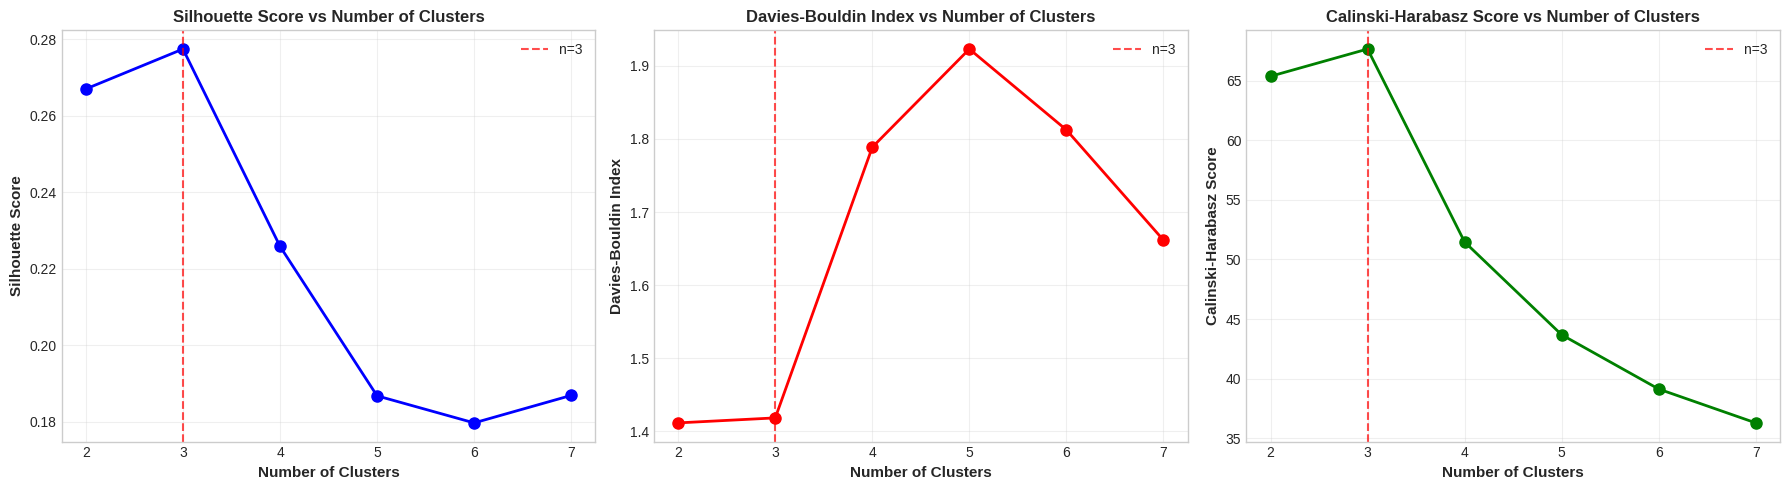


💡 According to silhouette score, optimal number of clusters: 3


In [11]:
# Test different numbers of clusters
cluster_range = range(2, 8)
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

print("Testing different numbers of clusters...\n")

for n in cluster_range:
    hc = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = hc.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)

    silhouette_scores.append(sil)
    davies_bouldin_scores.append(db)
    calinski_harabasz_scores.append(ch)

    print(f"n_clusters={n}: Silhouette={sil:.3f}, DB={db:.3f}, CH={ch:.2f}")

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette
axes[0].plot(cluster_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
axes[0].set_title('Silhouette Score vs Number of Clusters', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=3, color='r', linestyle='--', alpha=0.7, label='n=3')
axes[0].legend()

# Davies-Bouldin
axes[1].plot(cluster_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Davies-Bouldin Index', fontsize=11, fontweight='bold')
axes[1].set_title('Davies-Bouldin Index vs Number of Clusters', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=3, color='r', linestyle='--', alpha=0.7, label='n=3')
axes[1].legend()

# Calinski-Harabasz
axes[2].plot(cluster_range, calinski_harabasz_scores, 'go-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Clusters', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Calinski-Harabasz Score', fontsize=11, fontweight='bold')
axes[2].set_title('Calinski-Harabasz Score vs Number of Clusters', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].axvline(x=3, color='r', linestyle='--', alpha=0.7, label='n=3')
axes[2].legend()

plt.tight_layout()
plt.show()

optimal_n = cluster_range[np.argmax(silhouette_scores)]
print(f"\n💡 According to silhouette score, optimal number of clusters: {optimal_n}")

## 9. Cluster Profiling

Let me analyze what characterizes each cluster by looking at the mean feature values.

CLUSTER PROFILES (Mean Feature Values)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
predicted_cluster,,,,,,,,,,,,,
0,12.20,1.94,2.22,20.21,92.55,2.26,2.09,0.36,1.69,2.90,1.06,2.86,501.43
1,13.06,3.17,2.41,21.00,99.86,1.69,0.85,0.45,1.13,6.85,0.72,1.73,624.95
2,13.67,1.97,2.46,17.53,106.16,2.85,3.01,0.29,1.91,5.45,1.07,3.16,1076.05


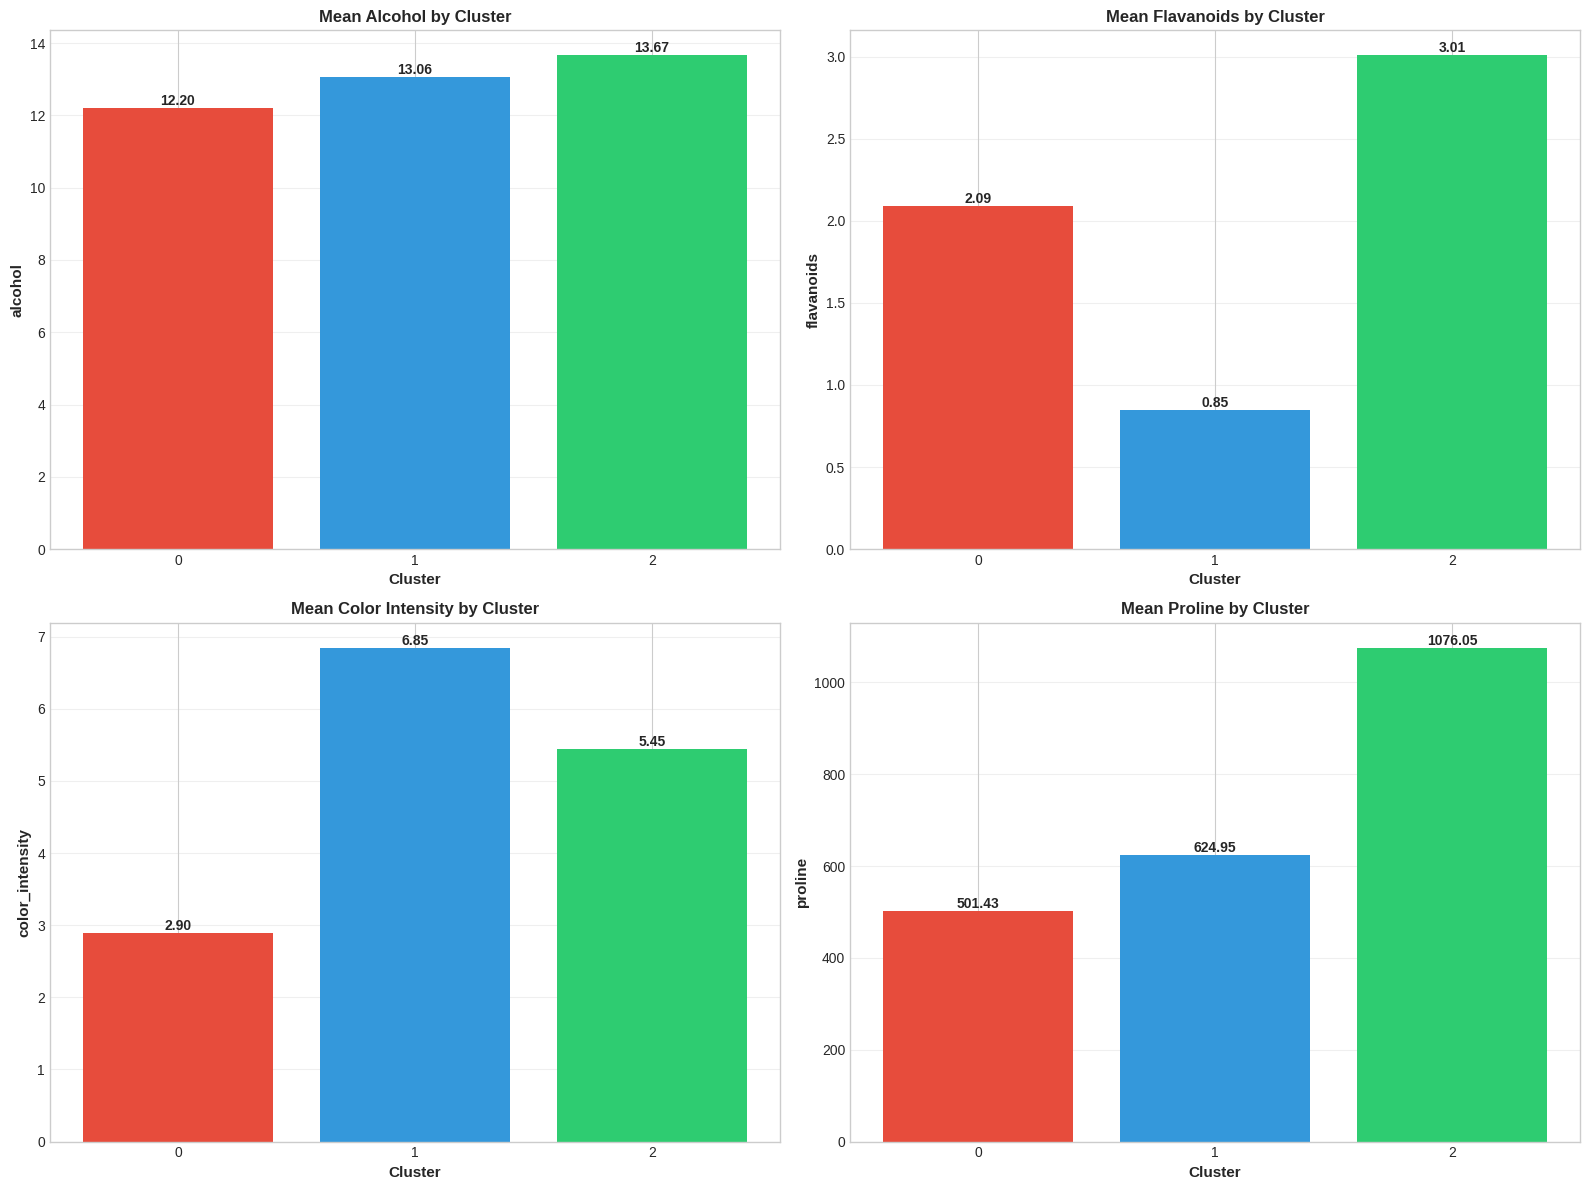


💡 Cluster Characteristics:

Cluster 0 (58 samples):
  • color_intensity: 42.8% lower than average
  • proline: 32.9% lower than average

Cluster 1 (56 samples):
  • flavanoids: 58.2% lower than average
  • color_intensity: 35.4% higher than average

Cluster 2 (64 samples):
  • flavanoids: 48.3% higher than average
  • proline: 44.1% higher than average


In [12]:
# Create DataFrame with predictions
df_clustered = df.copy()
df_clustered['predicted_cluster'] = y_pred_best

# Calculate mean values for each cluster
cluster_profiles = df_clustered.groupby('predicted_cluster')[feature_names].mean()

print("="*70)
print("CLUSTER PROFILES (Mean Feature Values)")
print("="*70)
display(cluster_profiles.round(2))

# Visualize cluster profiles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Select 4 most interesting features to plot
interesting_features = ['alcohol', 'flavanoids', 'color_intensity', 'proline']

for idx, feature in enumerate(interesting_features):
    cluster_means = df_clustered.groupby('predicted_cluster')[feature].mean()

    axes[idx].bar(range(n_clusters), cluster_means.values,
                  color=['#e74c3c', '#3498db', '#2ecc71'])
    axes[idx].set_xlabel('Cluster', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Mean {feature.replace("_", " ").title()} by Cluster',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xticks(range(n_clusters))
    axes[idx].grid(True, alpha=0.3, axis='y')

    # Add value labels
    for i, v in enumerate(cluster_means.values):
        axes[idx].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Cluster Characteristics:")
for cluster_id in range(n_clusters):
    cluster_data = df_clustered[df_clustered['predicted_cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} ({len(cluster_data)} samples):")

    # Find most distinctive features (highest/lowest values)
    for feature in interesting_features:
        mean_val = cluster_data[feature].mean()
        overall_mean = df[feature].mean()
        diff_pct = ((mean_val - overall_mean) / overall_mean) * 100

        if abs(diff_pct) > 20:  # Only show significant differences
            direction = "higher" if diff_pct > 0 else "lower"
            print(f"  • {feature}: {abs(diff_pct):.1f}% {direction} than average")

## 10. Comparing with K-Means

Let me quickly compare hierarchical clustering with K-Means to see which performs better on this dataset.

HIERARCHICAL CLUSTERING VS K-MEANS


,Method,Silhouette,Davies-Bouldin,ARI,NMI
0,Hierarchical (Ward),0.277444,1.418592,0.789933,0.786465
1,K-Means,0.284859,1.389188,0.897495,0.875894


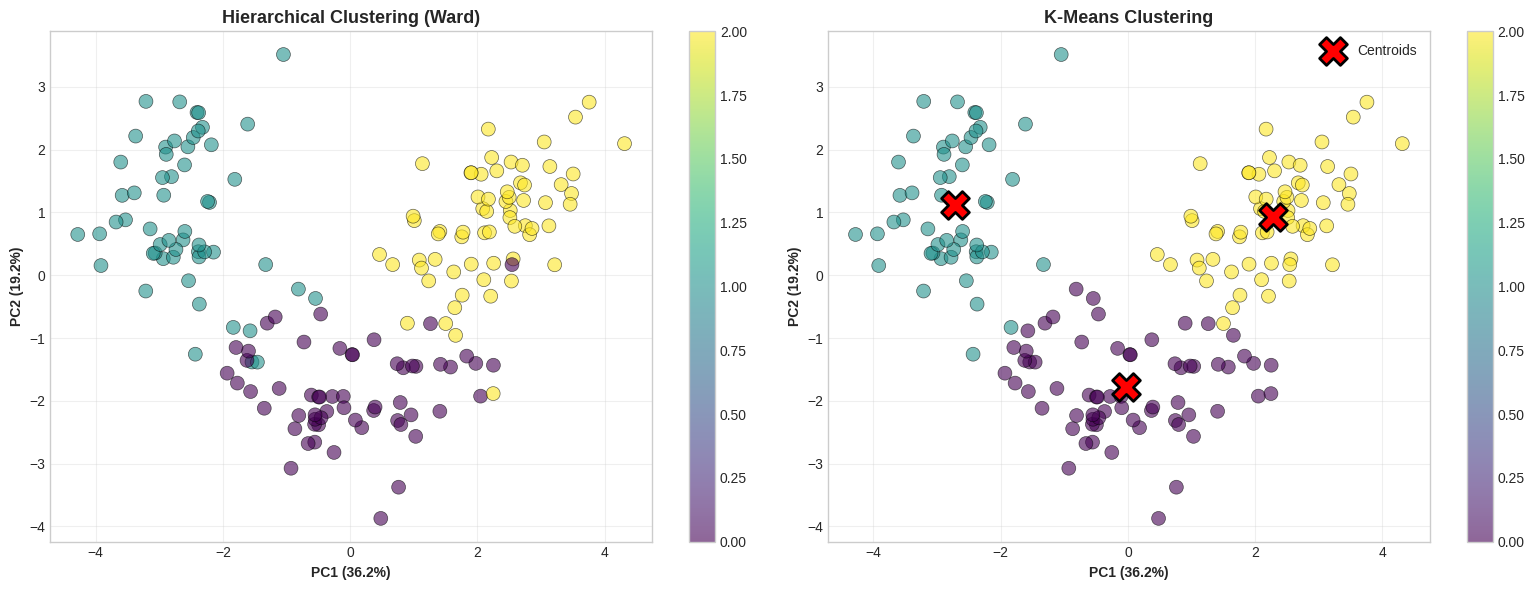


💡 Observations:
  • K-Means achieved better silhouette score
  • K-Means better matched the true wine classes


In [13]:
from sklearn.cluster import KMeans

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Calculate metrics for both
comparison_results = {
    'Hierarchical (Ward)': {
        'labels': y_pred_best,
        'silhouette': silhouette_score(X_scaled, y_pred_best),
        'davies_bouldin': davies_bouldin_score(X_scaled, y_pred_best),
        'ari': adjusted_rand_score(y_true, y_pred_best),
        'nmi': normalized_mutual_info_score(y_true, y_pred_best)
    },
    'K-Means': {
        'labels': y_kmeans,
        'silhouette': silhouette_score(X_scaled, y_kmeans),
        'davies_bouldin': davies_bouldin_score(X_scaled, y_kmeans),
        'ari': adjusted_rand_score(y_true, y_kmeans),
        'nmi': normalized_mutual_info_score(y_true, y_kmeans)
    }
}

# Create comparison table
comparison_table = pd.DataFrame({
    'Method': ['Hierarchical (Ward)', 'K-Means'],
    'Silhouette': [comparison_results['Hierarchical (Ward)']['silhouette'],
                   comparison_results['K-Means']['silhouette']],
    'Davies-Bouldin': [comparison_results['Hierarchical (Ward)']['davies_bouldin'],
                       comparison_results['K-Means']['davies_bouldin']],
    'ARI': [comparison_results['Hierarchical (Ward)']['ari'],
            comparison_results['K-Means']['ari']],
    'NMI': [comparison_results['Hierarchical (Ward)']['nmi'],
            comparison_results['K-Means']['nmi']]
})

print("="*70)
print("HIERARCHICAL CLUSTERING VS K-MEANS")
print("="*70)
display(comparison_table)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hierarchical clustering
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_best,
                          cmap='viridis', s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_title('Hierarchical Clustering (Ward)', fontsize=13, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontweight='bold')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0])

# K-Means
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans,
                          cmap='viridis', s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
               marker='X', s=400, c='red', edgecolors='black', linewidth=2, label='Centroids')
axes[1].set_title('K-Means Clustering', fontsize=13, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontweight='bold')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

print("\n💡 Observations:")
if comparison_results['Hierarchical (Ward)']['silhouette'] > comparison_results['K-Means']['silhouette']:
    print("  • Hierarchical clustering achieved better silhouette score")
else:
    print("  • K-Means achieved better silhouette score")

if comparison_results['Hierarchical (Ward)']['ari'] > comparison_results['K-Means']['ari']:
    print("  • Hierarchical clustering better matched the true wine classes")
else:
    print("  • K-Means better matched the true wine classes")

## 11. Summary and Key Takeaways

Let me summarize what I learned about hierarchical clustering:

### 🎯 Key Learnings:

1. **Hierarchical Structure**: Unlike K-Means, hierarchical clustering creates a tree structure (dendrogram) that shows relationships at multiple scales. This is really useful for understanding data organization!

2. **No Need to Specify K**: We can visualize the dendrogram and choose where to cut based on the structure, rather than specifying the number of clusters beforehand.

3. **Linkage Methods Matter**:
   - **Ward**: Usually best for balanced clusters (my go-to choice)
   - **Complete**: Good for compact, well-separated clusters
   - **Average**: A balanced compromise
   - **Single**: Can create elongated chains (often not desirable)

4. **Computational Cost**: O(n³) time complexity makes it slower than K-Means for large datasets. For this wine dataset (178 samples) it was fine, but for thousands of samples, K-Means might be more practical.

5. **Deterministic**: Unlike K-Means which can give different results on different runs, hierarchical clustering is deterministic - same input always gives same output.

### 📊 Wine Dataset Insights:

- Ward linkage performed best overall, with high silhouette score and good agreement with true wine classes
- The three wine cultivars have distinct chemical profiles that hierarchical clustering captured well
- Features like alcohol content, flavanoids, and color intensity were particularly discriminative
- Both hierarchical and K-Means performed similarly on this dataset, but hierarchical gave us more interpretability through the dendrogram

### 💭 Personal Reflections:

I really appreciate how the dendrogram visualization helps in understanding the data structure. It's not just about getting cluster assignments - you can see *how* the clusters relate to each other, which clusters are most similar, and at what level they merge. This is something K-Means can't provide.

However, I can also see why K-Means is more popular for large-scale applications. The computational cost of hierarchical clustering grows quickly with data size. For exploratory analysis on moderate-sized datasets though, hierarchical clustering is excellent!

The linkage method choice is crucial - I was surprised how much difference it made in the results. Ward linkage consistently gave the best results for this dataset, which makes sense since it tries to minimize within-cluster variance (similar to K-Means' objective).

### 🔍 When to Use Hierarchical Clustering:

✅ **Good for:**
- Small to medium datasets (< 10,000 samples)
- When you want to understand hierarchical relationships
- When you don't know the number of clusters beforehand
- Exploratory data analysis
- When deterministic results are important

❌ **Not ideal for:**
- Very large datasets (computational constraints)
- Real-time applications (slower than K-Means)
- When you need to predict cluster assignments for new data easily